In [1]:
import pandas as pd
import os

In [2]:

os.chdir(r'C:\Users\danny\GA_DataScience\nhl_project') #laptop dir
#os.chdir(r'C:\Users\Dan-PC\GA_DataScience\nhl_project') #desktop dir


In [3]:
player_season_mean_stats = pd.read_csv('player_season_mean_stats.csv', index_col = 0)

player_season_mean_stats.head()


,assists,blocked,evenTimeOnIce_s,faceOffWins,faceoffTaken,giveaways,goals,hits,penaltyMinutes_s,plusMinus,...,powerPlayGoals,powerPlayTimeOnIce_s,shortHandedAssists,shortHandedGoals,shortHandedTimeOnIce_s,shots,takeaways,timeOnIce_s,games_played,position
8475153,0.204545,1.250000,827.954545,0.000000,0.000000,0.340909,0.068182,2.636364,10.909091,-0.068182,...,0.000000,11.159091,0.0000,0.000000,87.090909,1.363636,0.409091,926.204545,44.0,Defenseman
8475179,0.135802,1.135802,1049.679012,0.000000,0.000000,0.580247,0.098765,1.543210,48.888889,-0.320988,...,0.024691,143.444444,0.0000,0.012346,108.469136,1.567901,0.358025,1301.592593,81.0,Defenseman
8474625,0.127273,0.345455,583.709091,0.200000,0.545455,0.090909,0.200000,2.090909,19.636364,-0.090909,...,0.054545,74.072727,0.0000,0.000000,0.254545,1.309091,0.254545,658.036364,55.0,Right Wing
8470039,0.250000,0.137500,808.087500,0.062500,0.225000,0.325000,0.100000,0.737500,16.500000,-0.225000,...,0.025000,155.462500,0.0125,0.000000,63.687500,2.350000,0.375000,1027.237500,80.0,Left Wing
8474498,0.173077,0.403846,628.634615,1.211538,2.500000,0.173077,0.173077,1.250000,43.846154,-0.038462,...,0.019231,20.903846,0.0000,0.000000,114.692308,1.923077,0.173077,764.230769,52.0,Center


In [4]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(player_season_mean_stats.drop(['games_played', 'position'], axis=1))


In [5]:
#run some clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [7]:
player_season_mean_stats['cluster'] = km.labels_
player_season_mean_stats.head()

,assists,blocked,evenTimeOnIce_s,faceOffWins,faceoffTaken,giveaways,goals,hits,penaltyMinutes_s,plusMinus,...,powerPlayTimeOnIce_s,shortHandedAssists,shortHandedGoals,shortHandedTimeOnIce_s,shots,takeaways,timeOnIce_s,games_played,position,cluster
8475153,0.204545,1.250000,827.954545,0.000000,0.000000,0.340909,0.068182,2.636364,10.909091,-0.068182,...,11.159091,0.0000,0.000000,87.090909,1.363636,0.409091,926.204545,44.0,Defenseman,0
8475179,0.135802,1.135802,1049.679012,0.000000,0.000000,0.580247,0.098765,1.543210,48.888889,-0.320988,...,143.444444,0.0000,0.012346,108.469136,1.567901,0.358025,1301.592593,81.0,Defenseman,0
8474625,0.127273,0.345455,583.709091,0.200000,0.545455,0.090909,0.200000,2.090909,19.636364,-0.090909,...,74.072727,0.0000,0.000000,0.254545,1.309091,0.254545,658.036364,55.0,Right Wing,1
8470039,0.250000,0.137500,808.087500,0.062500,0.225000,0.325000,0.100000,0.737500,16.500000,-0.225000,...,155.462500,0.0125,0.000000,63.687500,2.350000,0.375000,1027.237500,80.0,Left Wing,3
8474498,0.173077,0.403846,628.634615,1.211538,2.500000,0.173077,0.173077,1.250000,43.846154,-0.038462,...,20.903846,0.0000,0.000000,114.692308,1.923077,0.173077,764.230769,52.0,Center,3


In [8]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [9]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow', 'orange'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A393278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000023EFA320>]], dtype=object)

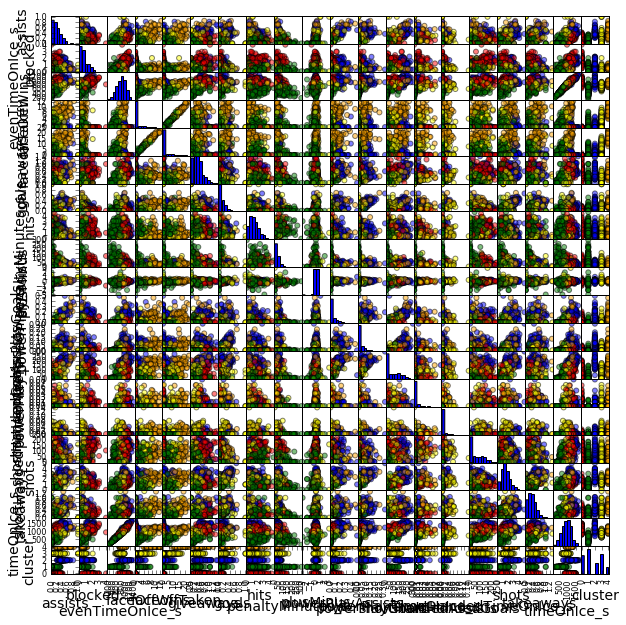

In [11]:
pd.scatter_matrix(player_season_mean_stats.drop(['games_played', 'position'], axis=1), c=colors[player_season_mean_stats.cluster], figsize=(10,10), s=100)
